# Aula 05 - CNNs

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- Redes Neurais Convolucionais (CNN);
- Convoluções;
- _Pooling_;
- Exercícios.

##   

# Redes Neurais Convolucionais (CNN)

As Redes Neurais Convolucionais são um ti´po de arquitetura específica para a análise de __imagens__, sendo um braço forte para modelos de __visão computacional__. As principais diferenças entre uma rede neural tradicional e uma CNN são dois tipos de camadas: as __convoluções__ e a __subamostragem (pooling)__.

<img src="https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" width=600>


## Convoluções

As convoluções têm como objetivo destacar elementos nas imagens que forem relevantes utilizando da aplicação de filtros. A forma como o filtro funciona seria como uma transformação matemática entre matrizes:

<img src="https://miro.medium.com/max/658/0*jLoqqFsO-52KHTn9.gif" width=500>

Com esses filtros, consegue-se criar os chamados __features maps__ ou mapas de atributo, que seria novas imagens destaques em determinados pontos da imagem de acordo com os filtros a serem aplicados:

<img src="https://miro.medium.com/max/875/1*ixuhX9vaf1kUQTWicVYiyg.png" width=900>

## Pooling

A camada de _Pooling_ ou também chamada de Subamostragem, ajuda a selecionar os principais elementos de uma imagem garantindo que seja representativo da imagem de origem. Então determinada uma janela de aplicação da subamostragem, o modelo percorre toda imagem aplicando algum tipo de agregação, como por exemplo média, máximo ou mesmo soma:

<img src="https://miro.medium.com/max/2340/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width=600>

<img src="https://www.bouvet.no/bouvet-deler/understanding-convolutional-neural-networks-part-1/_/attachment/inline/e60e56a6-8bcd-4b61-880d-7c621e2cb1d5:6595a68471ed37621734130ca2cb7997a1502a2b/Pooling.gif" width=600>

A Aplicação do _Pooling_ auxilia na rede no sentido de manter determinados pontos relevantes da imagem, mas auxilia ao mesmo tempo a generalizar para as demais imagens.

<img src = "https://www.bouvet.no/bouvet-deler/understanding-convolutional-neural-networks-part-2/_/attachment/inline/607c9f97-d102-4025-9d6d-4149831f1bc2:7486b2c8566539842998faeec3cd28d2d0aa5360/Screenshot%202019-07-01%20at%2019.43.59.png" width=800>


Notem que fazer esses processos envolvem sempre redução do tamanho ou da qualidade da imagem, mas podemos evitar esse tipo de efeito utilizando de duas técnicas auxiliares que são o __zero-padding__ e o __stride__

<br><br>

- _Zero-Padding_: Consiste em adicionar uma camada de zeros ao redor da imagem com o intuito de preservar o tamanho da imagem antes da convoluções ou subamostragem e sem acrescentar viés a transformação:

<img src = "https://deeplizard.com/assets/jpg/2b25a0c1.jpg" width=800>

- _Stride_: Consiste em determinar "saltos" durante a aplicação das janelas de filtros, sendo esses saltos tanto na vertical quanto na horizontal:

<img src = "https://miro.medium.com/max/1400/1*4wZt9G7W7CchZO-5rVxl5g@2x.gif" width=600>

## 

##  Exemplo - Fashion MNIST

Vamos revisitar o exercício do MNIST utilizando agora de uma CNN para avaliar as imagens:

In [1]:
# TensorFlow e tf.keras
import tensorflow
import keras

# Bibliotecas Auxiliares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Baixando a nossa base de dados

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

In [4]:
# Olhando os shapes
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
# Olhando a target
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Pré-Processamento dos Dados

In [6]:
# Reshape

#Faça o reshape da train_images dividindo por 255. e salvando na mesma variavel
train_images = train_images / 255.0

#Faça o reshape da test_images dividindo por 255. e salvando na mesma variavel
test_images = test_images/255.0

In [7]:
# Montar uma CNN
# 1 camada de convolução com 32 filtros e filtros com 3x3, ativação relu
# 1 camada MaxPooling com janela de 2x2
# Camada Flatten
# 1 camada dense com 100 neuronios e ativação relu
# camada de saída com 10 neurônios e ativação softmax


# Montar as camadas
cnn = keras.Sequential([
      keras.layers.Conv2D(32,                         # numero de filtros
                          (3,3),                      # dimensão do filtro
                          activation = 'relu',        # função de ativação
                          input_shape = (28, 28, 1)), # tamanho da entrada
      keras.layers.MaxPooling2D((2, 2)), # tamanho da janela
      keras.layers.Flatten(),            # Vetoriza as matrizes
      # Parte MLP
      keras.layers.Dense(100, activation = 'relu'),
      keras.layers.Dense(10, activation = 'softmax')
])

In [8]:
# Crie um compile() com os seguintes parametros:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

# Crie o summary() para o modelo
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [9]:
# Faça o fit do modelo passando train_images, train_labels e epochs = 10
cnn.fit(train_images,
        train_labels,
        epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3922 - accuracy: 0.8607
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2684 - accuracy: 0.9029
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2242 - accuracy: 0.9182
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1927 - accuracy: 0.9293
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1682 - accuracy: 0.9380


In [10]:
# crie o pred_labels usando a função predict_classes para o test_images
pred_labels = np.argmax(cnn.predict(test_images), axis = -1)

313/313 [==============================] - 1s 2ms/step


In [11]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

# Faça o print do classification_report para pred_labels e test_labels
print(classification_report(pred_labels, test_labels))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       979
           1       0.98      0.99      0.99       995
           2       0.88      0.85      0.87      1038
           3       0.87      0.95      0.91       913
           4       0.87      0.85      0.86      1030
           5       0.97      0.98      0.98       985
           6       0.79      0.75      0.77      1053
           7       0.97      0.95      0.96      1016
           8       0.97      0.99      0.98       984
           9       0.96      0.96      0.96      1007

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



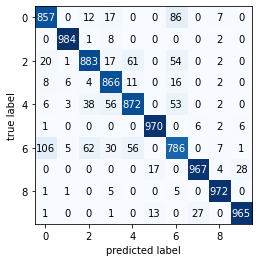

In [13]:
# Crie a matriz de confusão para o pred_labels e test_labels
cm = confusion_matrix(pred_labels, test_labels)
plot_confusion_matrix(conf_mat = cm)
plt.show()

## 

## Exercícios

__1)__ Desenvolva uma rede CNN para a base MNIST de classificação de dígitos, seguindo os passos abaixo:
- Carregue os dados segundo a função dada em aula, utilize os dados de teste como dados em __produção__, ou seja iremos usar em um outro momento;
- Nomeie os dados de treino como X e faça as seguintes separações: X em treino e teste (90/10%) e depois o X de treino em treino e validação (80/20%);
- Monte uma CNN;
- Faça as predições, avalie overfitting e salve o modelo final e os dados de produção;
- Carregue o modelo treinado e os dados de produção, e faça as novas predições.